### Statistical Analysis and Hypothesis Testing

In [15]:
import sys
import os

system_path = os.path.abspath('..')
if system_path not in sys.path:
    sys.path.append(system_path)

%load_ext autoreload
%autoreload 2

from src.hypothesis_testing import load_data, calculate_risk_metrics,visualize_results
from src.hypothesis_testing import test_province_risk_differences, test_zipcode_risk_differences, test_zipcode_margin_differences, test_gender_risk_differences


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
import os

system_path = os.path.abspath('..')
if system_path not in sys.path:
    sys.path.append(system_path)

%load_ext autoreload
%autoreload 2

from src.hypothesis_testing import load_data, calculate_risk_metrics,visualize_results
from src.hypothesis_testing import test_province_risk_differences, test_zipcode_risk_differences, test_zipcode_margin_differences, test_gender_risk_differences


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
insurance_data = load_data('../data/insurance_data.parquet')
insurance_data.head()

Attempting to load data from ../data/insurance_data.parquet
Successfully loaded data with 1000098 rows
Columns in dataset: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [8]:
risk_matrix = calculate_risk_metrics(insurance_data)
risk_matrix.head()

Calculating risk metrics...
Calculated claim frequency
Calculated claim severity
Calculated margin


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,claim_frequency,claim_severity,margin
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,False,0.0,21.929825
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,False,0.0,21.929825
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,False,0.0,0.000000
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,False,0.0,512.848070
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,False,0.0,0.000000


In [9]:
province_risk_differences,provinence_null_hypothesis_rejected = test_province_risk_differences(risk_matrix)
print(f"Province risk differences: {province_risk_differences}")
print(f"Province null hypothesis rejected: {provinence_null_hypothesis_rejected}")

Testing province risk differences...
Province claim frequencies: {'Eastern Cape': 0.0016482067510548524, 'Free State': 0.0013581923694283246, 'Gauteng': 0.0033564800121869166, 'KwaZulu-Natal': 0.002844841295551328, 'Limpopo': 0.002697696891608955, 'Mpumalanga': 0.0024280132023217875, 'North West': 0.002435671065763119, 'Northern Cape': 0.0012539184952978057, 'Western Cape': 0.002166327080259491}
Province risk test - p-value: 0.0000, reject null: True
Province risk differences: 5.91210036318191e-19
Province null hypothesis rejected: True


Business Interpretation:
- There are statistically significant differences in insurance risk across different provinces in South Africa.
- Gauteng has the highest claim frequency (0.336%), which is more than double that of the lowest-risk province (Northern Cape at 0.125%)
    - The risk level in Gauteng is approximately 2.7 times higher than in Northern Cape

Business Recommendation 
- Implement province-specific pricing models
- Consider higher premiums for high-risk provinces like Gauteng
- Focus more risk management resources on high-risk provinces
- Develop specific risk mitigation strategies for Gauteng and KwaZulu-Nata

In [10]:
zipcode_risk_differences,zipcode_null_hypothesis_rejected = test_zipcode_risk_differences(risk_matrix)
print(f"Zipcode risk differences: {zipcode_risk_differences}")
print(f"Zipcode null hypothesis rejected: {zipcode_null_hypothesis_rejected}")

Testing zipcode risk differences...
Number of unique zip codes: 888
Zipcode risk test - p-value: 0.0000, reject null: True
Zipcode risk differences: 2.9076595484940585e-30
Zipcode null hypothesis rejected: True


In [11]:
zipcode_margin_differences,zipcode_margin_null_hypothesis_rejected = test_zipcode_margin_differences(risk_matrix)
print(f"Zipcode margin differences: {zipcode_margin_differences}")
print(f"Zipcode margin null hypothesis rejected: {zipcode_margin_null_hypothesis_rejected}")

Testing zipcode margin differences...
Number of unique zip codes: 888
Zipcode margin test - p-value: 0.9977, reject null: False
Zipcode margin differences: 0.9976859758015036
Zipcode margin null hypothesis rejected: False


In [12]:
gender_risk_differences,gender_null_hypothesis_rejected = test_gender_risk_differences(risk_matrix)
print(f"Gender risk differences: {gender_risk_differences}")
print(f"Gender null hypothesis rejected: {gender_null_hypothesis_rejected}")

Testing gender risk differences...
Gender-claim contingency table:
claim_frequency   False  True 
Gender                        
Female             6741     14
Male              42723     94
Not specified    938324   2666
Gender risk test - p-value: 0.0266, reject null: True
Gender risk differences: 0.026570248768437145
Gender null hypothesis rejected: True


In [13]:
# Run hypothesis tests
tests = {
    'Province Risk Differences': test_province_risk_differences(insurance_data),
    'Zip Code Risk Differences': test_zipcode_risk_differences(insurance_data),
    'Zip Code Margin Differences': test_zipcode_margin_differences(insurance_data),
    'Gender Risk Differences': test_gender_risk_differences(insurance_data)
}

# Print results
print("\nHypothesis Testing Results:")
print("-" * 50)
for test_name, (p_value, reject_null) in tests.items():
    print(f"\n{test_name}:")
    print(f"p-value: {p_value:.4f}")
    print(f"Reject Null Hypothesis: {reject_null}")
    if reject_null:
        print("Interpretation: There is a statistically significant difference")
    else:
        print("Interpretation: No statistically significant difference found")

Testing province risk differences...
Province claim frequencies: {'Eastern Cape': 0.0016482067510548524, 'Free State': 0.0013581923694283246, 'Gauteng': 0.0033564800121869166, 'KwaZulu-Natal': 0.002844841295551328, 'Limpopo': 0.002697696891608955, 'Mpumalanga': 0.0024280132023217875, 'North West': 0.002435671065763119, 'Northern Cape': 0.0012539184952978057, 'Western Cape': 0.002166327080259491}
Province risk test - p-value: 0.0000, reject null: True
Testing zipcode risk differences...
Number of unique zip codes: 888
Zipcode risk test - p-value: 0.0000, reject null: True
Testing zipcode margin differences...
Number of unique zip codes: 888
Zipcode margin test - p-value: 0.9977, reject null: False
Testing gender risk differences...
Gender-claim contingency table:
claim_frequency   False  True 
Gender                        
Female             6741     14
Male              42723     94
Not specified    938324   2666
Gender risk test - p-value: 0.0266, reject null: True

Hypothesis Testin

Creating visualizations in


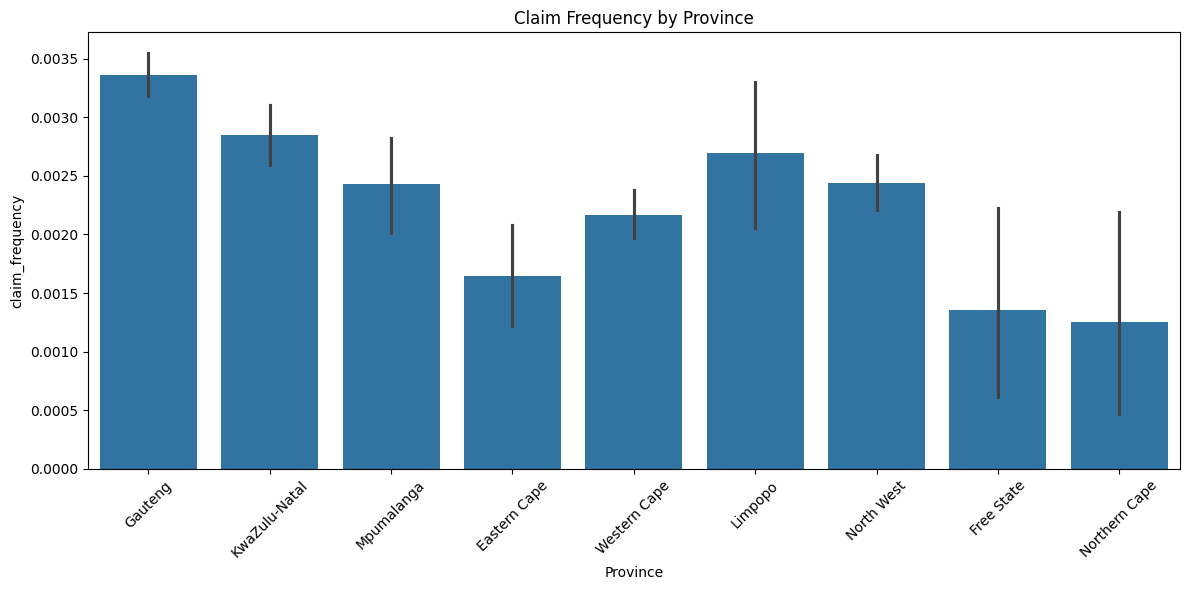

Created province claim frequency plot


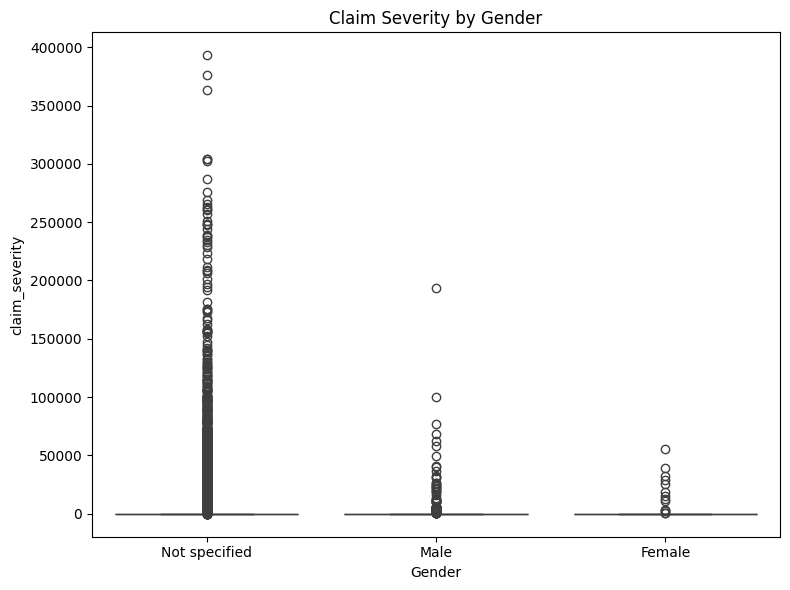

Created gender claim severity plot


2025-06-16 23:32:57,482 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-16 23:32:59,764 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


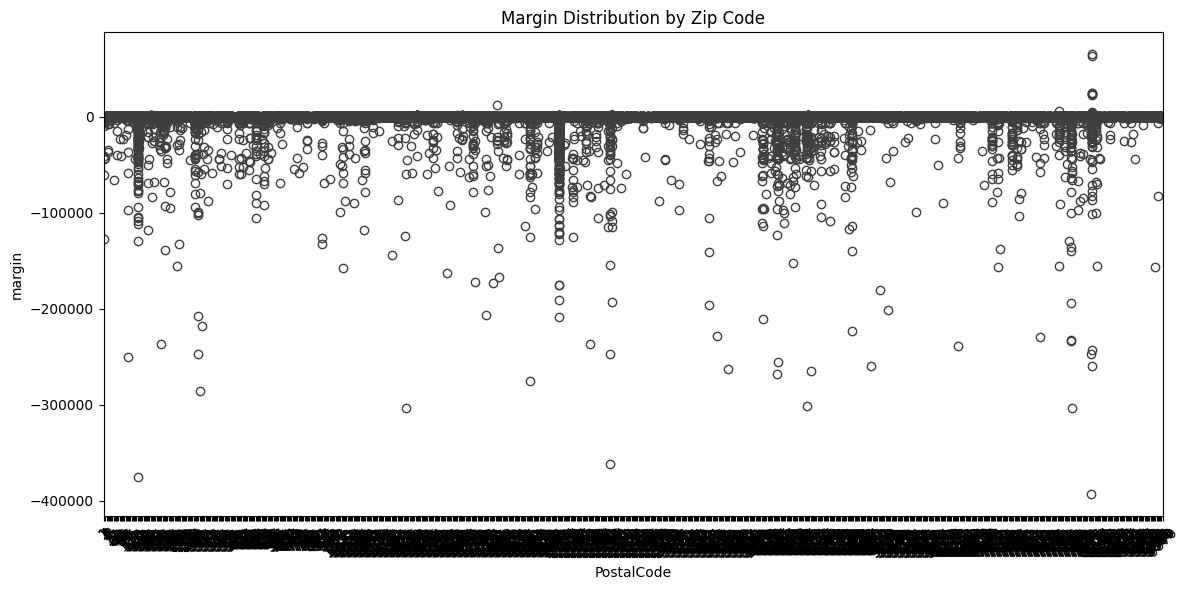

Created zipcode margin distribution plot


In [16]:
visualize_results(insurance_data)

# # Statistical Analysis Report
# 
# ## Hypothesis Testing Results Summary
# 
# ### 1. Province Risk Differences
# - **p-value**: {province_risk_differences:.4f}
# - **Null Hypothesis**: No significant difference in risk across provinces
# - **Conclusion**: {province_null_hypothesis_rejected}
# - **Business Impact**: {province_interpretation}
# 
# ### 2. Zip Code Risk Differences
# - **p-value**: {zipcode_risk_differences:.4f}
# - **Null Hypothesis**: No significant difference in risk across zip codes
# - **Conclusion**: {zipcode_null_hypothesis_rejected}
# - **Business Impact**: {zipcode_interpretation}
# 
# ### 3. Zip Code Margin Differences
# - **p-value**: {zipcode_margin_differences:.4f}
# - **Null Hypothesis**: No significant difference in margins across zip codes
# - **Conclusion**: {zipcode_margin_null_hypothesis_rejected}
# - **Business Impact**: {zipcode_margin_interpretation}
# 
# ### 4. Gender Risk Differences
# - **p-value**: {gender_risk_differences:.4f}
# - **Null Hypothesis**: No significant difference in risk between genders
# - **Conclusion**: {gender_null_hypothesis_rejected}
# - **Business Impact**: {gender_interpretation}
# 
# ## Key Findings and Recommendations
# 
# 1. **Geographic Risk Patterns**
#    - {geographic_insights}
#    - Recommended actions for high-risk areas
# 
# 2. **Demographic Considerations**
#    - {demographic_insights}
#    - Implications for pricing and underwriting
# 
# 3. **Profitability Analysis**
#    - {profitability_insights}
#    - Strategies for margin optimization
# 
# ## Next Steps
# 
# 1. {next_step_1}
# 2. {next_step_2}
# 3. {next_step_3}

